In [ ]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt



<div>
<img src="https://mukulrathi.com/aad8a78e265cb76c3b0ebe17a058b19c/conv-slide.gif" width="560"/>
</div>

In [ ]:
def convolve_2d(image, kernel):
    """
    Apply the 2d image filter (convolution) 
    according to the given kernel.
    Parameters
    ----------
    image : array_like
        Input 2D array (gray scale image).
    kernel : array_like
        Input kernel 2D array.
    Returns
    ----------
    filtered_img 
        Filtered image.
    """
    filtered_img = np.zeros_like(image)
    x_pad, y_pad = kernel.shape

    # zero padding
    if x_pad != 1:
        padded_image = np.zeros((image.shape[0] + x_pad-1, image.shape[1] + y_pad-1))
        padded_image[x_pad-2:-1,  y_pad-2:-1] = image
    else:
        padded_image = image

    for x in range(image.shape[1]):
        for y in range(image.shape[0]):
            filtered_img[y, x] = np.sum(padded_image[y: y+y_pad, x: x+x_pad] * kernel)

    return filtered_img

In [ ]:
def gaussian_kernel(size=5, sig=1.):
    """
    Create gaussian kernel from given size.
    Parameters
    ----------
    size : int
        Kernel size.
    sig : float
        Gaussian formula paramter.
    Returns
    ----------
    kernel 
        Output kernel.
    """
    ax = np.linspace(-(size - 1) / 2., (size - 1) / 2., size)
    gauss = np.exp(-0.5 * np.square(ax) / np.square(sig))
    kernel = np.outer(gauss, gauss)
    return kernel / np.sum(kernel)

In [ ]:
def visualize(**images):
    """
    PLot images in one row.
    Parameters
    ----------
    **images : ndarray
        Images sent for plotting.
        input image, ground_truth, generated_mask
    """
    n = len(images)
    plt.figure(figsize=(12, 5))
    for i, (name, image) in enumerate(images.items()):
        plt.subplot(1, n, i + 1)
        plt.xticks([])
        plt.yticks([]) 
        plt.title(' '.join(name.split('_')).title())
        plt.imshow(image, cmap = plt.get_cmap(name = 'gray'))
    plt.show()

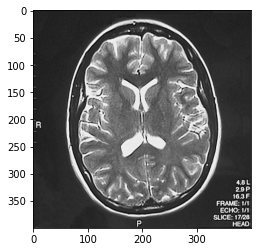

In [ ]:
img = cv.imread('/content/mr_image.jpg', 0)  
plt.imshow(img, cmap='gray', vmin=0, vmax=255)

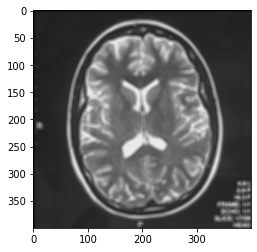

In [ ]:
kernel = np.ones((7, 7), np.float32) / 49 # blurring
# kernel = gaussian_kernel(5)
blurred_img = convolve_2d(img, kernel)
plt.imshow(blurred_img, cmap='gray', vmin=0, vmax=255)

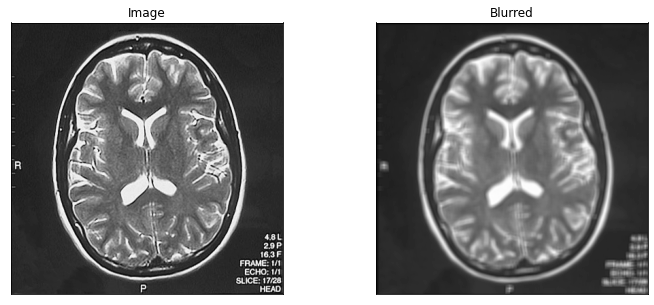

In [ ]:
visualize(
    image=img,
    blurred=blurred_img,
)